# Sensors

Sensors let your app know the relationship between a device and the physical world around it. Sensors can tell your app the direction, orientation, and movement of the device. These sensors can help make your game, augmented reality app, or utility app more useful and interactive by providing a unique form of input, such as using the motion of the device to arrange the characters on the screen or to simulate being in a cockpit and using the device as the steering wheel.

A lot of information can be retrive from a Mobile, but I will focus on that metrics that were record for our dataset.

The *Accelerometer* sensor measures G-force values along the X, Y, and Z axes of the device and is great for simple motion-based applications. G-force values include acceleration due to gravity. 

The following diagrams illustrate:

<li>V1 = Vector 1 = Force due to gravity
<li>V2 = Vector 2 = -Z axis of device chassis (points out of back of screen)
<li>Θi = Tilt angle (inclination) = angle between –Z axis of device chassis and gravity vector
</li>

<img src="images/accelerometer2.png">

The *Gyrometer* sensor measures angular velocities along the X, Y, and Z axes. These are very useful in simple motion-based apps that do not concern themselves with device orientation but care about the device rotating at different speeds. Gyrometers can suffer from noise in the data or a constant bias along one or more of the axes. You should query the accelerometer to verify whether the device is moving in order to determine if the gyrometer suffers from a bias, and then compensate accordingly in your app.

<img src="images/gyrometer.png">

The *Inclinometer* sensor specifies the yaw, pitch, and roll values of a device and work best with apps that care about how the device is situated in space. Pitch and roll are derived by taking the accelerometer’s gravity vector and by integrating the data from the gyrometer. Yaw is established from magnetometer and gyrometer (similar to compass heading) data. Inclinometers offer advanced orientation data in an easily digestible and understandable way. Use inclinometers when you need device orientation but do not need to manipulate the sensor data.

<img src="images/inclinometer.png">

# Mobile Sensor Data Set

This dataset we are going to analyse is from [Kaggle](https://www.kaggle.com/). It includes time-series data generated by accelerometer and gyroscope sensors (attitude, gravity, userAcceleration, and rotationRate). It is collected with an iPhone 6s kept in the participant's front pocket using SensingKit which collects information from Core Motion framework on iOS devices. A total of 24 participants in a range of gender, age, weight, and height performed 6 activities in 15 trials in the same environment and conditions: downstairs, upstairs, walking, jogging, sitting, and standing. With this dataset, authors aim to look for personal attributes fingerprints in time-series of sensor data, i.e. attribute-specific patterns that can be used to infer gender or personality of the data subjects in addition to their activities.


For each participant, the study had been commenced by collecting their demographic (age and gender) and physically-related (height and weight) information. Then, they provided them with a dedicated smartphone (iPhone 6) and asked them to store it in their trousers' front pocket during the experiment. All the participant were asked to wear flat shoes. They then asked them to perform 6 different activities (walk downstairs, walk upstairs, sit, stand and jogging) around the [Queen Mary University of London'](https://www.qmul.ac.uk/)s Mile End campus. 

For each trial, the researcher set up the phone and gave it to the current participants, then the researcher stood in a corner. Then, the participant pressed the start button of Crowdsense app and put it in their trousers' front pocket and performed the specified activity. We asked them to do it as natural as possible, like their everyday life. At the end of each trial, they took the phone out of their pocket and pressed the stop button. 

There are 15 trials:

**Long trials:** those with number 1 to 9 with around 2 to 3 minutes duration.<br>
**Short trials:** those with number 11 to 16 that are around 30 seconds to 1 minutes duration.

There are 24 data subjects. The `A_DeviceMotion_data` folder contains time-series collected by both Accelerometer and Gyroscope for all 15 trials. For every trial we have a multivariate time-series. Thus, we have time-series with 12 features: `attitude.roll`, `attitude.pitch`, `attitude.yaw`, `gravity.x`, `gravity.y`, `gravity.z`, `rotationRate.x`, `rotationRate.y`, `rotationRate.z`, `userAcceleration.x`, `userAcceleration.y`, `userAcceleration.z`.

The accelerometer measures the sum of two acceleration vectors: gravity and user acceleration. 

**User acceleration** is the acceleration that the user imparts to the device. Because Core Motion is able to track a device’s attitude using both the gyroscope and the accelerometer, it can differentiate between gravity and user acceleration. A CMDeviceMotion object provides both measurements in the gravity and userAcceleration properties. 

There are 6 different labels:


**`dws`**: downstairs <br>
**`ups`**: upstairs <br>
**`sit`**: sitting <br>
**`std`**: standing <br>
**`wlk`**: walking <br>
**`jog`**: jogging <br>


*__Acknowledgements:__*<br>
*Mohammad Malekzadeh, Richard G. Clegg, Andrea Cavallaro, and Hamed Haddadi. 2018. Protecting Sensory Data against Sensitive Inferences. In W-P2DS’18: 1st Workshop on Privacy by Design in Distributed Systems , April 23–26, 2018, Porto, Portugal. ACM, New York, NY, USA, 6 pages. https://doi.org/10.1145/3195258.3195260 *


The Inclinometer sensor specifies the yaw, pitch, and roll values of a device and work best with apps that care about 

## Reading the data

Setting working directory.

In [1]:
#import statsmodels.api as sm
import os,re
from pathlib2 import Path
from glob2 import glob #can capture patterns and supports recursive wildcards.
import pandas as pd

I will continue setting my working directoy. The cell has been hidden to preserve privacy but the pattern of the code is:

In [2]:
#os.chdir("Path")

The data has been compiled in a serie of different csv files. In order to have a full time serie and practise some data wrangling ,  I want to create an unique dataset from all these files.

In [4]:
os.listdir(".") #List current folder

['.ipynb_checkpoints',
 '.RData',
 '.Rhistory',
 'A_DeviceMotion_data',
 'data.txt',
 'data_subjects_info.csv',
 'Data_visualization.R',
 'df2.csv',
 'images',
 'mobile_ts.ipynb',
 'mobile_ts.md',
 'output.csv',
 'README.md',
 'requirements.txt',
 'summary_mean.csv']

In [6]:
#root = Path+A_DeviceMotion_data # hidden information but this is the pattern of the root dir to explore for datasets
df_csv = []

for root, dirs, files in os.walk(root):
        for file in files:
            if file.endswith (".csv"):
                df_csv.append(os.path.join(root,file)) #path
print("----> All paths have been imported.")

----> All paths have been imported.


In [7]:
#print(df_csv) #uncomment to print

Now, we have a list of files to read with the different directories. As the file name is the id of the subject of this experiment I want to keep this information. The performed activity is also an information that is stored as the folder name.
So, I am going to create a pair of columns with this information.

In [8]:
data = []
for csv in df_csv:
    frame = pd.read_csv(csv)
    path = os.path.dirname(csv)
    frame["activity"] = os.path.basename(path)
    frame["subject"] = os.path.basename(csv)
    data.append(frame)
print("----> All files have been imported.")

bigframe = pd.concat(data,ignore_index=True) #concatenate all files
print("----> All files have been appended")

----> All files have been imported.
----> All files have been appended


There are some cleaning to be done before exploring our data.

In [9]:
bigframe["act_id"] = bigframe.activity.apply(lambda x: x.split("_")[-1]) #write to another column activity id
bigframe["activity"] = bigframe.activity.apply(lambda x: x.split("_")[0]) #column to keep only activity name
bigframe["subject"] = bigframe["subject"].str.rstrip(".csv") #right strip removing file extension
bigframe["subject"] = bigframe.subject.apply(lambda x: x.split("sub_")[-1]) #keep only subject id

In [10]:
bigframe.columns = ["time", "roll", "pitch", "yaw", 
                    "gr_x", "gr_y", "gr_z", 
                    "rot_x", "rot_y", "rot_z",
                    "acc_x", "acc_y", "acc_z", 
                    "activity", "subject", "act_id"] 

In [11]:
def label_len(row):
    '''
    Result will be set to "short" or long according to :
    Long trials: those with number 1 to 9 with around 2 to 3 minutes duration.
    Short trials: those with number 11 to 16 that are around 30 seconds to 1 minutes duration.
    '''
    if int(row) in range(1,10): 
        return "long"
    elif int(row) in range(11,17): 
        return "short"

bigframe["label_len"]=bigframe.act_id.apply(label_len)

Let's take a look what it look like now:

In [12]:
print(bigframe.head(2))

   time      roll     pitch       yaw      gr_x      gr_y      gr_z     rot_x  \
0     0  1.528132 -0.733896  0.696372  0.741895  0.669768 -0.031672  0.316738   
1     1  1.527992 -0.716987  0.677762  0.753099  0.657116 -0.032255  0.842032   

      rot_y     rot_z     acc_x     acc_y     acc_z activity subject act_id  \
0  0.778180  1.082764  0.294894 -0.184493  0.377542      dws       1      1   
1  0.424446  0.643574  0.219405  0.035846  0.114866      dws       1      1   

  label_len  
0      long  
1      long  


We have also some information concerning hour subjects: weight, height, age and gender.

In [13]:
subjects = pd.read_csv("data_subjects_info.csv")

In [14]:
subjects.columns.values[0] = "subject"

In [15]:
print(subjects.head(4))

   subject  weight  height  age  gender
0        1     102     188   46       1
1        2      72     180   28       1
2        3      48     161   28       0
3        4      90     176   31       1


I will incorpore this information to my big dataset.

In [16]:
print(subjects.subject.dtypes)

int64


In [17]:
print(bigframe.subject.dtypes)

object


We need both values to be the same type for the merging

In [18]:
bigframe["subject"] = bigframe["subject"].apply(int)

In [19]:
bigframe = pd.merge(bigframe, subjects, how = "left", on = "subject")
print(bigframe.head(2))

   time      roll     pitch       yaw      gr_x      gr_y      gr_z     rot_x  \
0     0  1.528132 -0.733896  0.696372  0.741895  0.669768 -0.031672  0.316738   
1     1  1.527992 -0.716987  0.677762  0.753099  0.657116 -0.032255  0.842032   

      rot_y     rot_z   ...       acc_y     acc_z  activity subject  act_id  \
0  0.778180  1.082764   ...   -0.184493  0.377542       dws       1       1   
1  0.424446  0.643574   ...    0.035846  0.114866       dws       1       1   

  label_len weight  height  age  gender  
0      long    102     188   46       1  
1      long    102     188   46       1  

[2 rows x 21 columns]


Saving our final result is never a bad option.

In [20]:
bigframe.to_csv("output.csv", index = True, header = True)

## Exploratory Data Analysis

In [21]:
import pandas as pd
import os
import rpy2

### Basic Statistics

Now that we have our data set, let's begin our EDA.

In [22]:
#----------ERASE-------------
os.chdir("D:\\Dropbox\\github\\Projects\\Projects\\Machine Learning\\Mobile_ts") # to use in my Mountain pc
#%os.chdir("C:\\Users\\Raquel\\Dropbox\\GitHub\\Projects/Machine Learning\\Mobile_ts") #to use in my MSurface pc

In [23]:
df = pd.read_csv("output.csv", index_col = 0)

D:\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


With this dataset we want to check if we are going to be able to predict the gender of the user as well as the type of activity they are performing. So, for both variables I want to check if there is unbalanced data.

In [24]:
df["gender"].value_counts() #counts number of observation for each gender
df["gender"].value_counts()/ df["gender"].count()

1    0.573654
0    0.426346
Name: gender, dtype: float64

In [25]:
df["activity"].value_counts() #counts number of observation for each activity
df["activity"].value_counts()/df["activity"].count()

wlk    0.243681
sit    0.239781
std    0.216883
ups    0.111323
jog    0.095006
dws    0.093325
Name: activity, dtype: float64

In [26]:
print("The total number of observations is: {}".format(str(len(df))))

The total number of observations is: 1412865


In [27]:
df.columns

Index(['time', 'roll', 'pitch', 'yaw', 'gr_x', 'gr_y', 'gr_z', 'rot_x',
       'rot_y', 'rot_z', 'acc_x', 'acc_y', 'acc_z', 'activity', 'subject',
       'act_id', 'label_len', 'weight', 'height', 'age', 'gender'],
      dtype='object')

How many observations (rows) are in our dataset? and columns? are there missing values? Which type of values do we have?

In [28]:
#df = df.set_index("time")

Mean, quartiles, standar deviation, max, min values are as easy to find as one line of code

In [29]:
df.describe()
#df["time"].max()

,time,roll,pitch,yaw,gr_x,gr_y,gr_z,rot_x,rot_y,rot_z,acc_x,acc_y,acc_z,subject,act_id,weight,height,age,gender
count,1.412865e+06,1.412865e+06,1.412865e+06,1.412865e+06,1.412865e+06,1.412865e+06,1.412865e+06,1.412865e+06,1.412865e+06,1.412865e+06,1.412865e+06,1.412865e+06,1.412865e+06,1.412865e+06,1.412865e+06,1.412865e+06,1.412865e+06,1.412865e+06,1.412865e+06
mean,2.990502e+03,-1.760427e-01,-9.866487e-01,-1.492687e-01,4.213359e-02,7.547222e-01,-1.388248e-01,5.321167e-03,1.458119e-02,1.276031e-02,-3.910640e-03,4.424380e-02,3.927177e-02,1.247175e+01,7.572748e+00,7.212055e+01,1.739890e+02,2.883202e+01,5.736535e-01
std,2.593531e+03,1.566652e+00,4.940860e-01,1.544769e+00,3.388300e-01,3.332649e-01,4.283231e-01,1.292916e+00,1.226470e+00,8.080411e-01,3.282090e-01,5.275663e-01,3.762121e-01,6.924861e+00,3.901147e+00,1.598129e+01,8.798617e+00,5.303463e+00,4.945456e-01
min,0.000000e+00,-3.141590e+00,-1.569974e+00,-3.141588e+00,-9.998220e-01,-9.999930e-01,-9.999990e-01,-1.736579e+01,-1.841441e+01,-1.215124e+01,-6.369264e+00,-5.673592e+00,-7.743481e+00,1.000000e+00,1.000000e+00,4.800000e+01,1.610000e+02,1.800000e+01,0.000000e+00
25%,9.930000e+02,-1.480050e+00,-1.358278e+00,-1.277552e+00,-1.725300e-01,5.837930e-01,-3.922410e-01,-2.860300e-01,-1.669860e-01,-9.733300e-02,-4.751300e-02,-6.213600e-02,-2.361300e-02,7.000000e+00,5.000000e+00,6.000000e+01,1.640000e+02,2.500000e+01,0.000000e+00
50%,2.226000e+03,1.222180e-01,-1.181032e+00,-1.356530e-01,1.991400e-02,9.249990e-01,-9.690200e-02,-3.940000e-04,3.250000e-04,1.770000e-04,8.910000e-04,4.336000e-03,3.433000e-03,1.300000e+01,7.000000e+00,7.200000e+01,1.750000e+02,2.800000e+01,1.000000e+00
75%,4.317000e+03,8.763600e-01,-6.233930e-01,8.291430e-01,2.721440e-01,9.775030e-01,8.488200e-02,1.163210e-01,2.312710e-01,1.133280e-01,4.428400e-02,5.176600e-02,1.047770e-01,1.900000e+01,9.000000e+00,7.800000e+01,1.800000e+02,3.100000e+01,1.000000e+00
max,1.642300e+04,3.141579e+00,1.567175e+00,3.141584e+00,9.999980e-01,1.000000e+00,9.813120e-01,1.046806e+01,1.754312e+01,1.143624e+01,7.120793e+00,7.322722e+00,8.125357e+00,2.400000e+01,1.600000e+01,1.020000e+02,1.900000e+02,4.600000e+01,1.000000e+00


What about the different activities we can track? and what do we know about the subjects?

In [30]:
print("There are {} activities. These are: {}".format(df["activity"].nunique(), list(df["activity"].unique())))
print("We have {} activities according to lenght. And we have {} activities".format(df["label_len"].unique(), list(df.groupby("label_len")["activity"].nunique())))

There are 6 activities. These are: ['dws', 'jog', 'sit', 'std', 'ups', 'wlk']
We have ['long' 'short'] activities according to lenght. And we have [6, 6] activities


In [31]:
df2 = df.groupby(by = ["subject","activity"])["label_len"].agg("nunique")
df2

subject  activity
1        dws         2
         jog         2
         sit         2
         std         2
         ups         2
         wlk         2
2        dws         2
         jog         2
         sit         2
         std         2
         ups         2
         wlk         2
3        dws         2
         jog         2
         sit         2
         std         2
         ups         2
         wlk         2
4        dws         2
         jog         2
         sit         2
         std         2
         ups         2
         wlk         2
5        dws         2
         jog         2
         sit         2
         std         2
         ups         2
         wlk         2
                    ..
20       dws         2
         jog         2
         sit         2
         std         2
         ups         2
         wlk         2
21       dws         2
         jog         2
         sit         2
         std         2
         ups         2
         wlk    

Each subject performs each one of the possible activities in both lengths.

### Data Visualization

In [32]:
df.head()

,time,roll,pitch,yaw,gr_x,gr_y,gr_z,rot_x,rot_y,rot_z,...,acc_y,acc_z,activity,subject,act_id,label_len,weight,height,age,gender
0,0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,...,-0.184493,0.377542,dws,1,1,long,102,188,46,1
1,1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,...,0.035846,0.114866,dws,1,1,long,102,188,46,1
2,2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,...,0.134701,-0.167808,dws,1,1,long,102,188,46,1
3,3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,...,0.136788,0.094958,dws,1,1,long,102,188,46,1
4,4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,...,0.353996,-0.044299,dws,1,1,long,102,188,46,1


In [33]:
numerical = ("roll", "pitch", "yaw", "gr_x", "gr_y", "gr_z","rot_x", "rot_y", "rot_z", "acc_x", "acc_y", "acc_z")

In [34]:
#long = df["label_len"].filter("long", df)
df = df.reset_index()
summary_mean = df.groupby(by= ["time","activity", "gender"])[numerical].mean()

In [35]:
summary_mean.tail(5)

,,,roll,pitch,yaw,gr_x,gr_y,gr_z,rot_x,rot_y,rot_z,acc_x,acc_y,acc_z
time,activity,gender,,,,,,,,,,,,
16419,std,0,-1.697280,-1.163849,1.084489,-0.392640,0.918333,0.049929,0.016522,-0.041271,-0.001652,-0.052688,0.010057,0.065031
16420,std,0,-1.696374,-1.164667,1.085189,-0.391940,0.918657,0.049479,0.024057,0.034094,0.059193,-0.119367,0.028502,0.045308
16421,std,0,-1.699372,-1.168712,1.085431,-0.388101,0.920247,0.050177,0.054160,-0.231900,0.217841,0.081400,-0.014669,0.102747
16422,std,0,-1.697491,-1.170770,1.090484,-0.386315,0.921051,0.049208,0.134297,-0.149422,0.035629,0.027917,-0.036133,0.073565
16423,std,0,-1.696307,-1.170511,1.095857,-0.386610,0.920950,0.048780,0.074797,-0.178704,-0.049138,0.003065,-0.012442,0.061221


In [36]:
summary_mean.to_csv("summary_mean.csv", index = True, header = True)

In [37]:
df2 =pd.melt(summary_mean.reset_index(), 
             id_vars = ["time", "activity", "gender"],
             value_vars = numerical, 
             value_name = "metric" )

In [38]:
df2.head()

,time,activity,gender,variable,metric
0,0,dws,0,roll,0.030195
1,0,dws,1,roll,-0.118793
2,0,jog,0,roll,-0.426860
3,0,jog,1,roll,-0.123804
4,0,sit,0,roll,-0.400358


In [39]:
df2.to_csv("df2.csv", header = True)

In [40]:
%load_ext rpy2.ipython

In [41]:
#from rpy2.robjects.packages import importr

In [42]:
%%R
# import R packages if they are not installed
list.of.packages <- c("ggplot2", "tidyr", "dplyr")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages, repos = "http://cran.us.r-project.org")


In [43]:
%%R
#Load Packages
library(ggplot2)
library(tidyr)

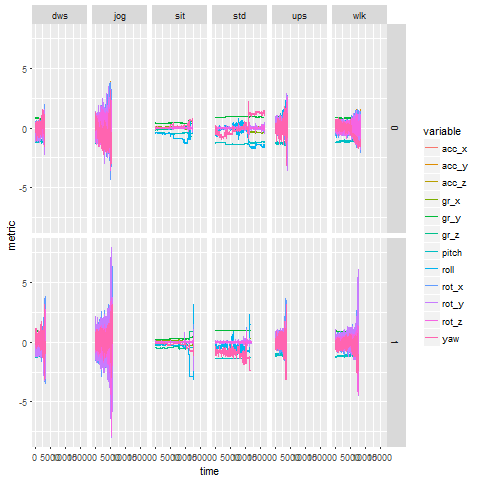

In [44]:
%%R -i df2
f <- ggplot(df2, aes(time, metric, col=variable)) + geom_line()
f+facet_grid(gender~activity)

Finally, we want to provide an easy way to recreate our working environment exporting the 'requirements' text file. 

In [45]:
! pip freeze > requirements.txt